# Homework 4

In [131]:
import yfinance as yf 
import math
import pandas as pd
import numpy as np
import numpy_financial as npf
from matplotlib import pyplot as plt
pd.options.mode.chained_assignment = None

In [29]:
#GET YAHOO FINANCE INFO
data = yf.download('^GSPC','2020-09-30','2022-10-01')
data.to_csv("SP500.csv")
print(data)
data = data.drop(["Open", "High", "Low", "Adj Close", "Volume"], axis = 1)
data

[*********************100%***********************]  1 of 1 completed
                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2020-09-30  3341.209961  3393.560059  3340.469971  3363.000000  3363.000000   
2020-10-01  3385.870117  3397.179932  3361.389893  3380.800049  3380.800049   
2020-10-02  3338.939941  3369.100098  3323.689941  3348.419922  3348.419922   
2020-10-05  3367.270020  3409.570068  3367.270020  3408.600098  3408.600098   
2020-10-06  3408.739990  3431.560059  3354.540039  3360.969971  3360.969971   
...                 ...          ...          ...          ...          ...   
2022-09-26  3682.719971  3715.669922  3644.760010  3655.040039  3655.040039   
2022-09-27  3686.439941  3717.530029  3623.290039  3647.290039  3647.290039   
2022-09-28  3651.939941  3736.739990  3640.610107  3719.040039  3719.040039   
2022-09-29  3687.010010  3687.010010  3610.399902  3640.469971

,Close
Date,
2020-09-30,3363.000000
2020-10-01,3380.800049
2020-10-02,3348.419922
2020-10-05,3408.600098
2020-10-06,3360.969971
...,...
2022-09-26,3655.040039
2022-09-27,3647.290039
2022-09-28,3719.040039


### Question 1 (10%)
Please find the volatility of S&P500 and plot the graph of close price.

Volitility: Close     0.011505


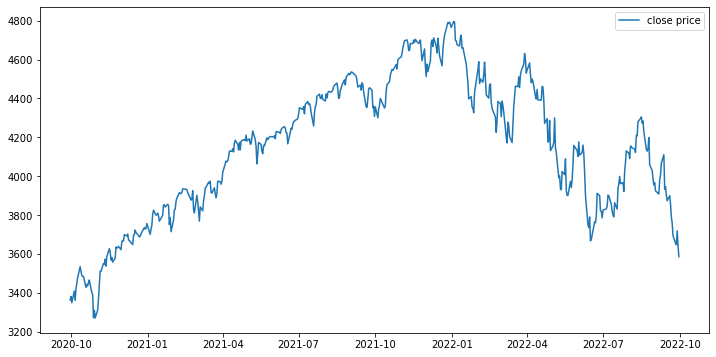

In [54]:
rateOfReturn = np.empty(len(data['Close'])-1)
for i in range(1,len(data['Close'])):
    rateOfReturn[i-1] = (data['Close'][i] - data['Close'][i-1]) / data['Close'][i-1]

volitility = round(np.std(rateOfReturn),6)
print("Volitility: Close     " + str(volitility))

plt.figure(figsize=(12,6))#default:(6.4,4.8)
plt.plot(data['Close'],label='close price')
plt.legend()

### Question 2 (30%)
Set basis cost = $15$, leverage = $10$, trading frequency = $30$, data = data and other parameters as default.  
Please implement the following backtest function and 
1. Compute internal rate of return
2. plot the equity curve. 


*Feel free to add any other attributes or functions to help you implement your backtest function.*

In [151]:
class backtest:
    def __init__(self,data = None, basis_cost = 15, trading_fee_rate = 0.0005, init_capital = 50000, leverage = 10, trading_frequency = 30):
        self.basis_cost = basis_cost
        self.trading_fee_rate = trading_fee_rate
        self.init_capital = init_capital
        self.contractNum = 0
        self.leverage = leverage
        self.trading_frequency = trading_frequency
        self.equilities = []

        self.data = data.copy()
        self.data["adj close after change position"] = 0 
        self.data["adj weight"] = 0
        self.data["position"] = 0
        self.data["total value"] = init_capital * leverage
        self.data["equity"] = init_capital


    def backtest(self):

        periodNums = math.ceil(len(self.data['Close'])/self.trading_frequency)
        print("periodNums:" + str(periodNums))
        curCapital = self.init_capital
        profitEachPeriod = np.empty(periodNums)
        for i in range(periodNums):
            buyPrice = self.data['Close'][i * self.trading_frequency]
            if i != periodNums-1:
                sellPrice = self.data['Close'][(i+1) * self.trading_frequency - 1]
            else:
                sellPrice = self.data['Close'][len(self.data['Close'])-1]

            income = (sellPrice - buyPrice) * 250 * self.leverage
            fee = self.init_capital * self.leverage * self.trading_fee_rate / (1 + self.leverage * self.trading_fee_rate)
            
            if i != 0:
                profit = income - fee * 2 - self.basis_cost
            else:
                profit = income - fee * 2
            
            profitEachPeriod[i] = profit
            
            print("period:"+str(i)+";sell:"+str(sellPrice)+";buy:"+str(buyPrice))
            #print("period:"+str(i) + ";income:" + str(income))
            curCapital = self.countCurCapital(curCapital,income,fee)
        irr = npf.irr(profitEachPeriod)
        print(profitEachPeriod)
        equility = 0
        for i in range(len(profitEachPeriod)):
            equility += profitEachPeriod[i]
            self.equilities.append(equility)
        
    def countCurCapital(self,curCapital,income,fee):
            curCapital = curCapital + income - fee
            if curCapital <= 0:
                print("no money")
            return curCapital
    
    def plotEquility(self):
        eq = np.array(self.equilities)
        plt.plot(eq)

periodNums:17
period:0;sell:3545.530029296875;buy:3363.0
period:1;sell:3690.010009765625;buy:3572.659912109375
period:2;sell:3915.590087890625;buy:3703.06005859375
period:3;sell:3910.52001953125;buy:3911.22998046875
period:4;sell:4167.58984375;buy:3889.139892578125
period:5;sell:4221.85986328125;buy:4201.6201171875
period:6;sell:4395.259765625;buy:4166.4501953125
period:7;sell:4468.72998046875;buy:4387.16015625
period:8;sell:4566.47998046875;buy:4443.0498046875
period:9;sell:4686.75;buy:4574.7900390625
period:10;sell:4482.72998046875;buy:4701.2099609375
period:11;sell:4328.8701171875;buy:4397.93994140625
period:12;sell:4391.68994140625;buy:4201.08984375
period:13;sell:4132.14990234375;buy:4462.2099609375
period:14;sell:3790.3798828125;buy:4101.22998046875
period:15;sell:4199.1201171875;buy:3863.159912109375
period:16;sell:3585.6201171875;buy:4057.659912109375
[  455827.56080438   292862.73170281   530812.56080438    -2287.41478156
   695612.36549188    50086.85279656   571511.41334344 

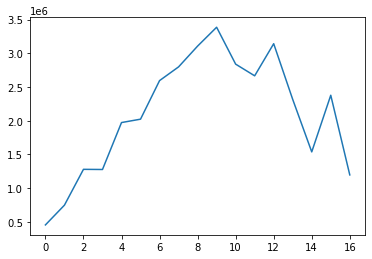

In [152]:
sp500 = backtest(
    data = data,
    basis_cost = 15,
    trading_fee_rate = 0.0005,
    init_capital = 50000,
    leverage = 10,
    trading_frequency = 30,
)
sp500.backtest()
sp500.plotEquility()

-1.0


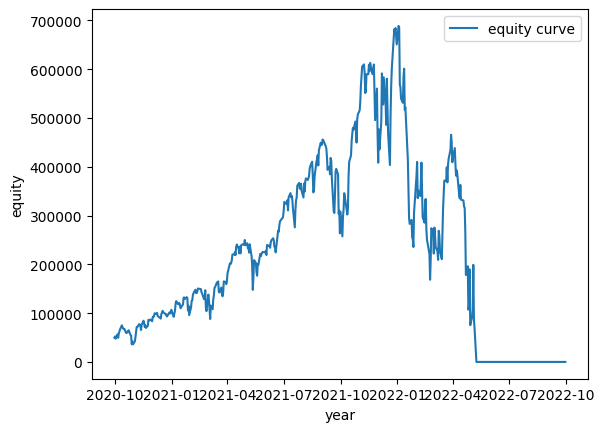

### Question 3 (10%)
Try different leverages (1, 5, 10) and trading frequencies (7, 30, 90). Find the relationship between those parameters and the equity curve.

In [ ]:
sp500 = backtest(
    data = data,
    basis_cost = 15,
    trading_fee_rate = 0.0005,
    init_capital = 50000,
    leverage = 1,
    trading_frequency = 10,
)
sp500.backtest()

sp500 = backtest(
    data = data,
    basis_cost = 15,
    trading_fee_rate = 0.0005,
    init_capital = 50000,
    leverage = 5,
    trading_frequency = 10,
)
sp500.backtest()

sp500 = backtest(
    data = data,
    basis_cost = 15,
    trading_fee_rate = 0.0005,
    init_capital = 50000,
    leverage = 10,
    trading_frequency = 10,
)
sp500.backtest()

In [ ]:
sp500 = backtest(
    data = data,
    basis_cost = 15,
    trading_fee_rate = 0.0005,
    init_capital = 50000,
    leverage = 10,
    trading_frequency = 7,
)
sp500.backtest()

sp500 = backtest(
    data = data,
    basis_cost = 15,
    trading_fee_rate = 0.0005,
    init_capital = 50000,
    leverage = 10,
    trading_frequency = 30,
)
sp500.backtest()

sp500 = backtest(
    data = data,
    basis_cost = 15,
    trading_fee_rate = 0.0005,
    init_capital = 50000,
    leverage = 10,
    trading_frequency = 90,
)
sp500.backtest()

----------leverage----------
leverage: 1 APY: 0.008934201408747233


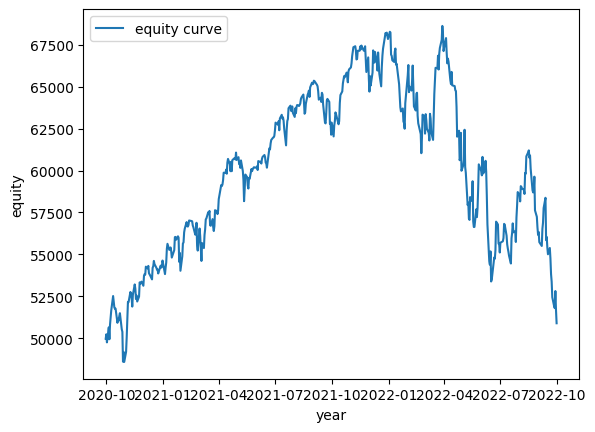

leverage: 5 APY: -0.3428872637438486


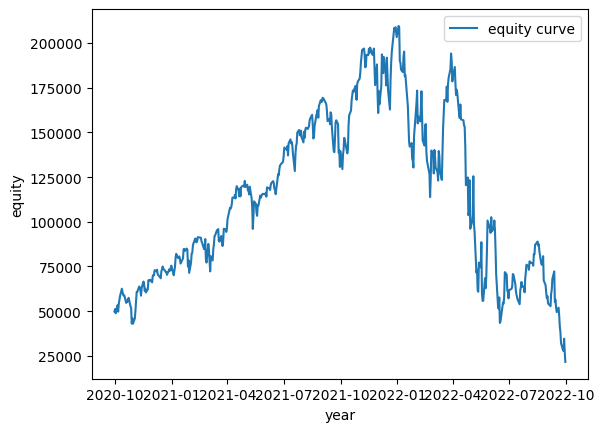

leverage: 10 APY: -1.0


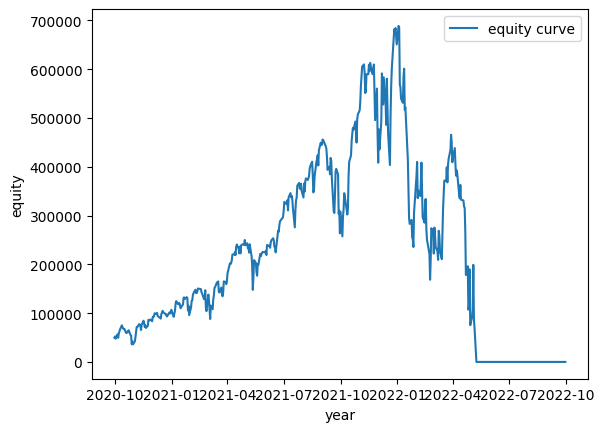

----------frequency----------
frequency: 7 APY: -0.83216705620036


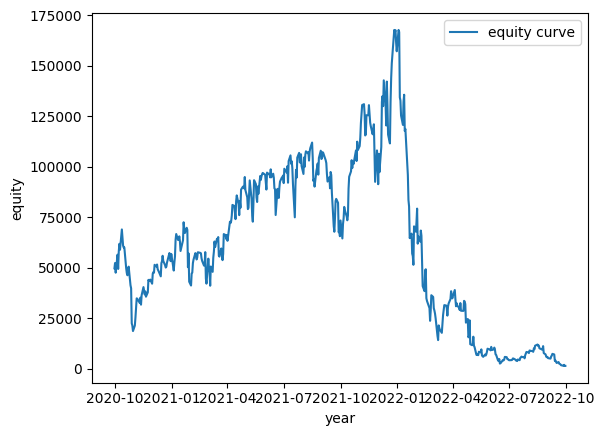

frequency: 30 APY: -1.0


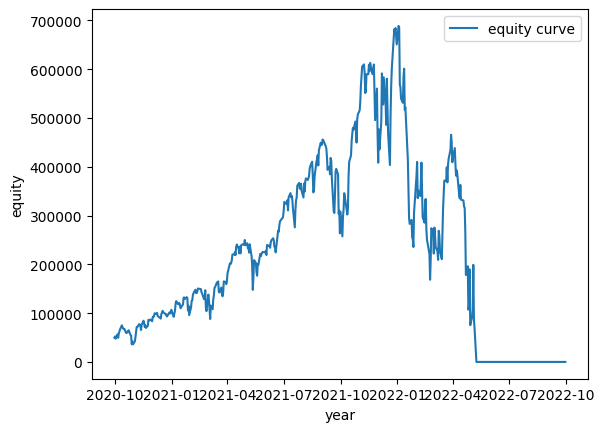

frequency: 90 APY: -1.0


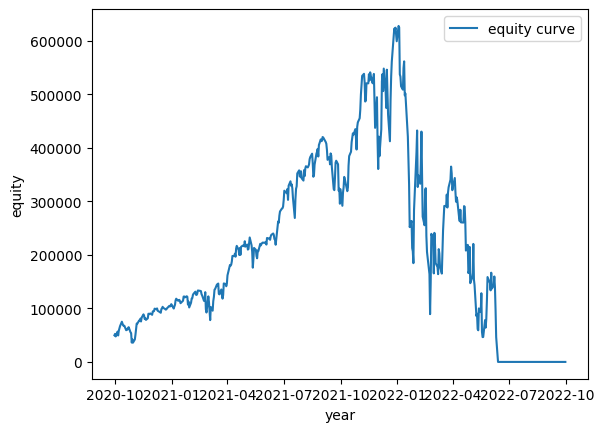

### Question 4 (30%)
Set the parameters as default. Compute the APY with different leverage.

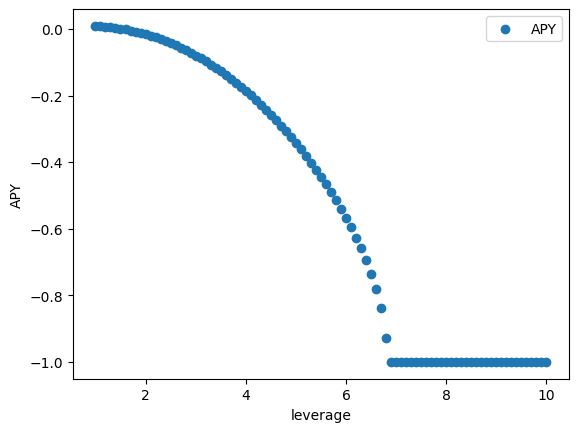

### Question 5 (20%)
Randomly sort the daily up/down and check if the order of daily up/down could influence the backtest performance.

,Close,updown
Date,,
2020-09-30,3363.000000,0.000000
2020-10-01,3449.423208,0.025698
2020-10-02,3406.127011,-0.012552
2020-10-05,3389.805103,-0.004792
2020-10-06,3386.618997,-0.000940
...,...,...
2022-09-26,3494.367281,0.002818
2022-09-27,3520.223322,0.007399
2022-09-28,3532.353172,0.003446


### Bonus (10%)
After applying the Monte Carlo method. Please find out a threshold of leverage where only 5% of the equity curve has MDD > 20%

## Submission
Please write a report for those questions. Submit your report and code to NTU Cool.

Format:
* {student_id}_report.pdf
* {student_id}_code.ipynb